In [1]:
import pydicom as dicom
import matplotlib.pyplot as plt
from os import listdir
import glob
import cv2
import numpy as np
from math import *

In [2]:
def smoothenCurve(thicknesses,windowSize):
    n=int(windowSize/2)
    averageThicknesses=[]
    for i in range(360):
        sumOfThicknessBeforeCurrentAngle=0;sumOfThicknessAfterCurrentAngle=0;thicknessAtCurrentAngle=thicknesses[i];
        iteratorBefore=n;iteratorAfter=n;
        while(iteratorBefore>0):
            sumOfThicknessBeforeCurrentAngle=sumOfThicknessBeforeCurrentAngle+thicknesses[(360+(i-iteratorBefore))%360]
            iteratorBefore-=1;
        while(iteratorAfter>0):
            sumOfThicknessBeforeCurrentAngle=sumOfThicknessBeforeCurrentAngle+thicknesses[(360+(i+iteratorAfter))%360]
            iteratorAfter-=1;
        averageThickness=(sumOfThicknessBeforeCurrentAngle+thicknesses[i]+sumOfThicknessAfterCurrentAngle)/windowSize;
        averageThicknesses.append(averageThickness);
#     print(averageThicknesses)
    return averageThicknesses;

In [3]:
def thicknessAtParticularAngleWithSmoothing(path):
#     read image
    src=cv2.imread(path)
#     get grayscale image
    grayImage=cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#     get binary image
    ret,thresh = cv2.threshold(grayImage,127,255,0)
#     calculate moments of binary image
    M = cv2.moments(thresh)
#     calculate x and y coordinates of center
    cX = M["m10"] / M["m00"]
    cY = M["m01"] / M["m00"]
#     list for plotting
    angles=[]
    thicknesses=[]
    for angle in range(0,360):
        rf=0;rl=0;flag1=0;flag2=0
        for radius in range(1,50):
            x=int(cX+radius*cos(angle * 3.14 / 180.0))
            y=int(cY+radius*sin(angle * 3.14 / 180.0))
#             condition to check inner boundary is met
            if thresh[x][y]==255 and flag1==0:
                flag1=1
                rf=radius
            elif flag1==1:
                if thresh[x][y]==255:
                    rl=radius
                elif thresh[x][y]==0:
#               condition to check if point is out of outer boundary
                    flag2=1;
                    break
        if flag2==1:
#             print('angle:',angle,'inner-boundary radius:',rf,'outer-boundary radius:',rl,'thickness:',rl-rf,sep=' ')
            angles.append(angle)
            thicknesses.append(rl-rf)
#     print(thicknesses)
    SmoothenedThicknesses=smoothenCurve(thicknesses,50)
    plt.plot(angles,SmoothenedThicknesses)
    plt.show()
#     SmoothenedThicknesses=smoothenCurve(thicknesses,5)
#     plt.plot(angles,SmoothenedThicknesses)
#     plt.show()
#     SmoothenedThicknesses=smoothenCurve(thicknesses,7)
#     plt.plot(angles,SmoothenedThicknesses)
#     plt.show()

In [4]:
def thicknessAtParticularAngleWithoutSmoothing(path):
#     read image
    src=cv2.imread(path)
#     get grayscale image
    grayImage=cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
#     get binary image
    ret,thresh = cv2.threshold(grayImage,127,255,0)
#     calculate moments of binary image
    M = cv2.moments(thresh)
#     calculate x and y coordinates of center
    cX = M["m10"] / M["m00"]
    cY = M["m01"] / M["m00"]
#     list for plotting
    angles=[]
    thicknesses=[]
    for angle in range(0,360):
        rf=0;rl=0;flag1=0;flag2=0
        for radius in range(1,50):
            x=int(cX+radius*cos(angle * 3.14 / 180.0))
            y=int(cY+radius*sin(angle * 3.14 / 180.0))
#             condition to check inner boundary is met
            if thresh[x][y]==255 and flag1==0:
                flag1=1
                rf=radius
            elif flag1==1:
                if thresh[x][y]==255:
                    rl=radius
                elif thresh[x][y]==0:
#               condition to check if point is out of outer boundary
                    flag2=1;
                    break
        if flag2==1:
#             print('angle:',angle,'inner-boundary radius:',rf,'outer-boundary radius:',rl,'thickness:',rl-rf,sep=' ')
            angles.append(angle)
            thicknesses.append(rl-rf)
    plt.plot(angles,thicknesses)
    plt.show()

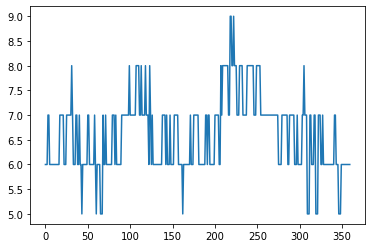

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask4.png


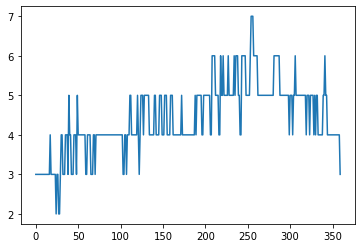

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask5.png


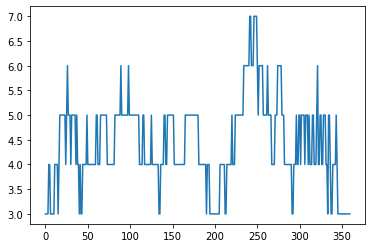

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask7.png


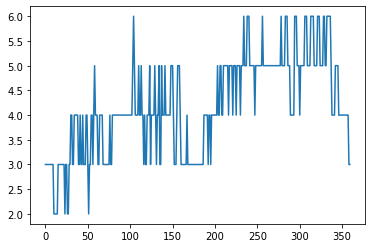

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask6.png


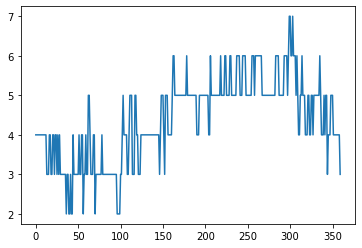

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask2.png


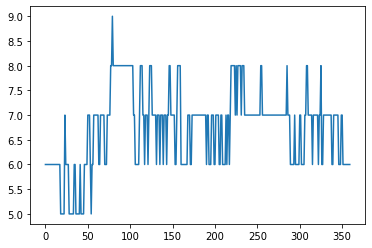

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask3.png


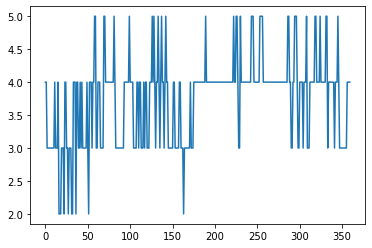

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask1.png


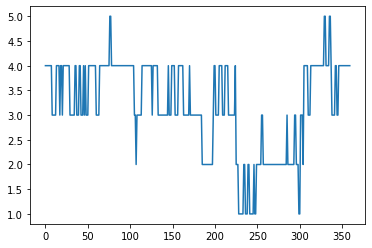

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask0.png


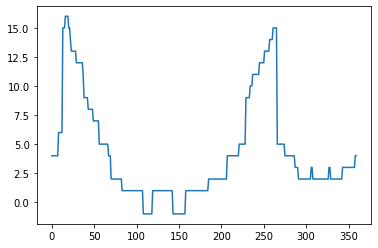

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask8.png


In [5]:
sourceFolder='/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/*.png'
list_of_myocardium_overlays=[f for f in glob.glob(sourceFolder)]
for img in list_of_myocardium_overlays:
    thicknessAtParticularAngleWithoutSmoothing(img)
    print(img)

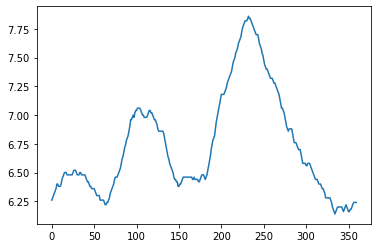

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask4.png


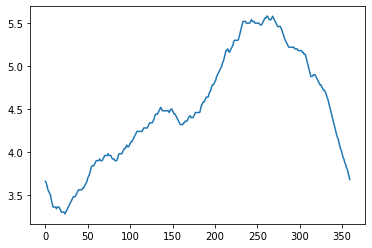

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask5.png


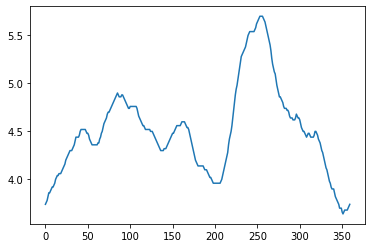

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask7.png


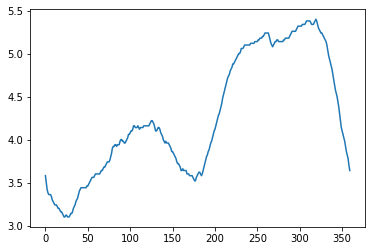

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask6.png


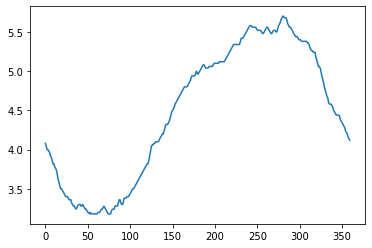

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask2.png


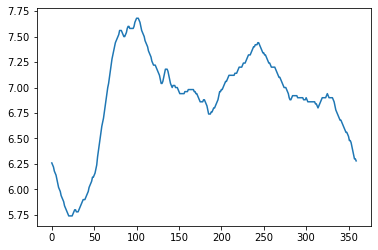

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask3.png


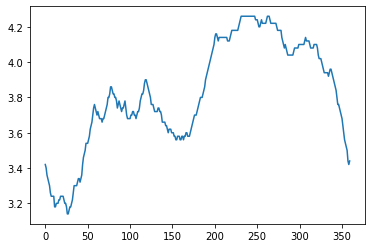

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask1.png


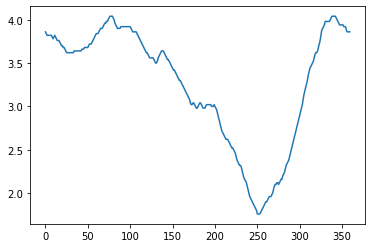

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask0.png


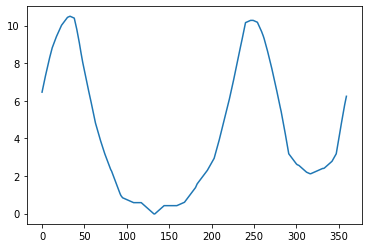

/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask8.png


In [6]:
sourceFolder='/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/*.png'
list_of_myocardium_overlays=[f for f in glob.glob(sourceFolder)]
for img in list_of_myocardium_overlays:
    thicknessAtParticularAngleWithSmoothing(img)
    print(img)

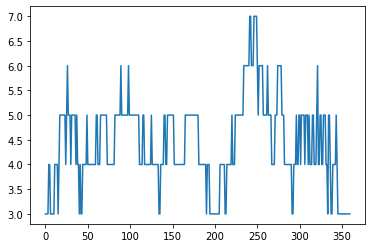

In [7]:
thicknessAtParticularAngleWithoutSmoothing('/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask7.png')

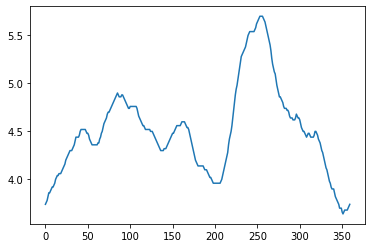

In [8]:
thicknessAtParticularAngleWithSmoothing('/Users/notroot/Desktop/Project/MB18043554/Dicom_in_png/myocardium/MyocardiumMask7.png')